# Classification Performance and Cross Validation

Thanks to the `scikit-learn` package, measuring the performance of different machine learning models is simple using the `sklearn.metrics` module (we have used it already when talking about regression!). 

In this section, we will briefly discuss this module in reference to measuring the performance of classifiers. We will also introduce an additional final aspect essential to machine learning: **cross validation**

## Classification Metrics

Similarly to what we have seen for regression, there are various metrics to measure the performance of classifiers. If you want to know about all of the available choices and their detailed description, the best possible source is to directly look into the relative `scikit-learn` documentation page [here](https://scikit-learn.org/stable/modules/model_evaluation.html). 

Because of its importance and widespread use, and because it effectively summarises different aspects of classifiers, in this note we will focus purely on one of the main metrics contained within the module: the **F-score**. Wikipedia has a very nice article about it with a good graphical illustration [here](https://en.wikipedia.org/wiki/F-score)

The F-score, $F_1$ is the harmonic mean of $P$ and $R$, where $P$ is the so-called **precision** of the classifier, and $R$ is the **recall**, defined as:

\begin{align}
F_1 &= \frac{2 P R}{P+R} \\
R &= \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}\\
P &= \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
\end{align}


**Note**: This metrics has a few variants, and can be simply called with the function `sklearn.metrics.f1_score`

Examining the formula above, it can be seen that the minimum value for $F_1$ is 0, when $\text{True Positives} = 0$, and it has a maximum value of $F_1=1$ when $(\text{False Positives} + \text{False Negatives}) = 0$, in other words, when there are no incorrect predictions.

The use of $F_1$ has a metric has received some criticism, in particular for its asymmetric form (if you change the definition of negative vs positive, which is somewhat arbitrary, the score changes!). 

$F_1$ is not the only important metric that can be used and others might be more relevant, depending on the problem. In particular, the cost of making a wrong prediction might be different depending on whether it is a false positive vs a false negative, and this should be taken into account when evaluating a classifier.

> Imagine the case of a covid test and consider the cost for making a false negative vs a false positive prediction before and after working vaccines were developed. What would you consider a potentially better metric in this case?

## Confusion Matrix

Different metrics used to evaluate a classifier boiled down to different combinations of the fraction of false and true positive and false and true negative. For this reason, regardless of the metric chosen, it is usually quite instructive to visualise this raw data.

A confusion matrix is a graphical way to represent this data. In particular, the confusion matrix highlights the amount of wrong vs right predictions, and makes it extremely easy to understand if errors are skewed towards false positive or false negatives. This latter aspect is quite important to potentially improve the classifier and / or understand its limits.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics

y_test = ['A', 'B', 'A', 'B', 'A', 'B']
y_pred = ['B', 'B', 'A', 'B', 'A', 'B']
target_names = ['class A', 'B']

print(sklearn.metrics.classification_report( y_test, y_pred, target_names=target_names) )



              precision    recall  f1-score   support

     class A       1.00      0.67      0.80         3
           B       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



## Cross Validation

> **Cross-validation** is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data.</i> (taken from [Amazon Web Services](https://docs.aws.amazon.com/machine-learning/latest/dg/cross-validation.html))

Up until this point, we have made a single test-train split, with a single training fraction e.g. `train_ratio = 0.1`. Cross-validation is the act of taking many different test-train splits, and check the results to ensure the consistency of the algorithm chosen. In other words, cross-validation is performed to ensure that a user is picking the best possible model which performs well not just in one particular case, but across many different cases.

Said in a different way, the main goal of cross-validation is to prevent **over-fitting** and to gauge how well different strategies such as regularisation, or specific choices of hyper-parameters for the model, prevent this phenomenon. 

> reminder: over-fitting is when a model performs very well on the data provided to it, but poorly on any new data.

The diagram below demonstrates how cross-validation works in practice. 

<img src="https://miro.medium.com/max/700/1*_7OPgojau8hkiPUiHoGK_w.png">

The steps taken to perform cross-validation are as follows:

1. Decide the train-test split parameters 
2. Choose how many times to do the cross-validation (e.g. 5) 
3. Choose a model (e.g. `LinearRegression`)
4. For each time, use the model to predict data and measure the score (i.e. compare `y_pred` to `y_test`)
5. Analyse the mean and standard deviation and compare accross different models.

Returning to the previous section of this lecture, Support Vector Machines, it should be clear that the parameters chosen for the kernel function are highly important, as they determine whether or not the data is linearly separable. A common technique for deciding which parameters to use for the kernel function is indeed cross-validation.

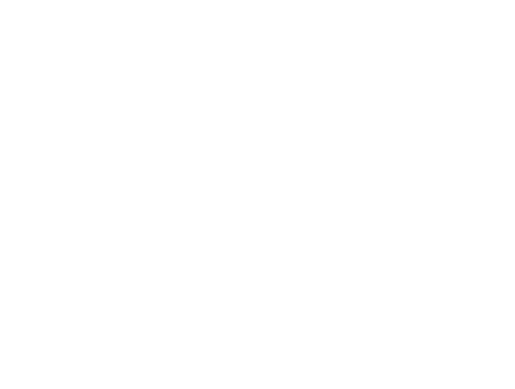

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

def create_axes() -> list:
    # create axes
    fig, ax = plt.subplots(2,2)
    for i in range(2):
        for j in range(2):
            ax[i][j].axis('off')
            ax[i][j].grid('on')
    return ax[0][0], ax[0][1], ax[1][0], ax[0][0]

def get_training_indices(N: int, ratio: float, seed: int = 100) -> tuple:
    """Conduct a train test split"""
    # make sure the the ratio is in the right range
    assert ratio < 1 and ratio > 0

    # reset random seed for repeatability
    random.seed(seed)
    
    # calculate training size which must be an int
    training_size = int(N * ratio)
    
    # create list of all possible indices
    indices = range(N)
    
    # use random.sample(k) to randomly select training indices
    training_indices = indices.sample(training_size)
    
    # get test_indices as well by selecting the indices that
    # are not in the training_indices list
    test_indices = []
    for idx in indices:
        if idx not in training_indices:
            test_indices.append(idx)
        
    return training_indices, test_indices

def cross_validation_4(X: np.ndarray, y: np.ndarray):
    """Plot 4 different sets of train-test splits"""
    axes = create_axes()
    
    for i in range(4):
        # get training indices
        # get test indices
                
        # make split in X and append to relevant list
        # make split in y and append to relevant list
        None
    return

cross_validation_4('','')

### Cross-validation in `scikit-learn` 

Thankfully, `scikit-learn` contains a large number of different cross-validation techniques. Here we will only provide a graphical representation, whereas for an exact, accurate explanation we will simply refer to the specific part of the documentation in `scikit-learn` which can be found [here](https://scikit-learn.org/stable/modules/cross_validation.html) and [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html). (this is the end of the course so by now you should have all the tools necessary to understand the documentation of any Python library by yourself!)

It is important that you consult these pages and links within it to fully examine how to do the most effective train-test splitting and cross-validation for your particular application.

**Please not that these specific sections pointed out by the hyperlinks are considered part of the lecture material!**

<table>
    <tr>
        <td><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_004.png" /></td>
        <td><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_005.png" /></td>
    </tr>
    <tr>
        <td><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_006.png" /></td>
        <td><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_007.png" /></td>
    </tr>
    <tr>
        <td><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_008.png" /></td>
        <td><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_009.png" /></td>
    </tr>
    <tr>
        <td><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_010.png" /></td>
    </tr>
</table>